Margarida de Lima Santos Gonçalves

# Epidemic data of COVID-19 in Catalonia

The [datoscovid.cat website](https://dadescovid.cat/?lang=cas) came into operation 28th of July 2020 to monitor the epidemiological epidemic of COVID-19 in Catalonia. In this notebook we will use data from this website and other sources.

You can also find interesting data in [transparenciacatalunya.cat](https://analisi.transparenciacatalunya.cat/Salut/Registre-de-defuncions-per-COVID-19-a-Catalunya-Se/uqk7-bf9s).



## Exercises:

Please, upload the completed notebook and the used files.

### Exercise 1:
We propose to explore data related with Covid-19 from Catalonia to analyze several aspects.
- **Exercise 1.A.**: Relationship between information of population of the municipality and the number of Covid-19 cases on it.

    After analyzing the relationship you should be able to answer the following questions:
    1. Do larger municipalities have a higher incidence of Covid-19?
    2. In Catalonia, the bigger the city the denser it is?
    3. Do municipalities with a higher population density have a higher incidence of Covid-19?


- **Exercise 1.B.**: Relationship between information of economy of the catalan region and the number of Covid-19 cases on it.

    After analyzing the relationship you should be able to answer the following questions:
    4. Do richer regions have a lower incidence of Covid-19?



- **Exercise 1.C.**: Analysis of the differences of Covid-19 affecting women and men in Catalonia
    
    After analyzing the relationship you should be able to answer the following questions:
    5. Does Covid-19 affect men more than women?
    6. What age groups does Covid-19 affect the most for men and women?


Please, answer the questions, and extract and write conclusions from the three anlysis. 

### Exercise 2: 

Think other possible questions which can be solved.


# Exercise 1.A. Relationship between the municipality's population and the number of Covid-19 cases

## Data from COVID-19 and municipality

Our first objective is to plot relationship between information of population of the municipalities and the number of Covid-19 cases on these municipalities.

For that, we need access to Covid-19 data and data from the municipalities in Catalonia that can be achieved from [datoscovid.cat](https://dadescovid.cat/) and from [IDESCAT](https://www.idescat.cat), respectively.

You can download the following files from the websites:
- Data of the register of Covid-19 cases carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of population for the municipalities with more than 20.000 people (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=250)): "t15228.csv"


### Some help for the exercise:

- Load the two tables (casos_sexe_municipi.csv and t15228.csv) as dataframes.
- Clean the data and prepare it for analysis (there are empty rows in the files).
- Merge the two tables:
    - For the correct matching, check if the name of the municipalities are all the same in the two tables (apostrophes and accents).
- Plot the relationship between population and covid cases.
    - Remove outliers if there are any.
- Instead of using global numbers, compute the incidence of covid as a ratio of cases per capita and redraw the plot.
- Answer the questions posed.


Answer the questions and write your conclusions here:

In [125]:
# importing necessary libraries
import pandas as pd
import unidecode
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

###### Note:
All altair plots can be zoomed in and have tooltips, this meaning that hovering through data points should give information on the data points themselves.

#### Loading and cleaning the dataframes

In [126]:
# loading dataframes getting rid of NaN values (appear as No Classificat in the file)
casos = pd.read_csv('./files/casos_sexe_municipi.csv',sep=";", encoding='latin-1')
mun20 = pd.read_csv('./files/t15228.csv', sep=';')
casos = casos.reset_index(drop=True)
mun20 = mun20.reset_index(drop=False)
mun20 = mun20.rename(columns={'index': 'MUNICIPIDESCRIPCIO'})

###### Note
I deleted the first lines of the t15228.csv file prior to this in the .csv file itself, since they had useless information for our analysis.

In [127]:
# checking the dataframes
casos.head()

,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,DISTRICTE_CODI,DISTRICTEDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,11.0,BAIX LLOBREGAT,8073.0,CORNELLÀ DE LLOBREGAT,NaN,No classificat,1.0,Dona,Positiu per ELISA,3
1,NaN,NaN,NaN,No classificat,NaN,No classificat,NaN,No classificat,Epidemiològic,3
2,NaN,NaN,NaN,No classificat,NaN,No classificat,NaN,No classificat,Epidemiològic,2
3,13.0,BARCELONES,8019.0,BARCELONA,10.0,SANT MARTÍ,0.0,Home,Positiu per ELISA,6
4,40.0,VALLES OCCIDENTAL,8187.0,SABADELL,NaN,No classificat,1.0,Dona,Positiu per ELISA,2


In [128]:
mun20.head()

,MUNICIPIDESCRIPCIO,Població,Superfície km²,Densitat hab./km²,Rang per nombre d'hab.
0,Barcelona,1636193,"101,4","16144,0",1
1,"Hospitalet de Llobregat, l'",265444,"12,4","21406,8",2
2,Terrassa,224114,"70,2","3194,3",3
3,Badalona,223506,"21,2","10552,7",4
4,Sabadell,215760,"37,8","5709,5",5


We will keep the rows that have all the information we need for our analysis.
We want to see the relationship between municipalities' population and the number of Covid-19 cases. Therefore, we will require the municipalities' name and the number of cases. We will discard rows that do not have the municipalities' name.

In the case that we want to stratify even more this information we will further clean the dataframe according to additional variables we wish to consider. For now I will leave it like this so we work with as much information as possible.

In [129]:
casos = casos[casos['MUNICIPIDESCRIPCIO'] != 'No classificat']
casos = casos.dropna(subset=['MUNICIPIDESCRIPCIO'])
casos

,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,DISTRICTE_CODI,DISTRICTEDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,11.0,BAIX LLOBREGAT,8073.0,CORNELLÀ DE LLOBREGAT,NaN,No classificat,1.0,Dona,Positiu per ELISA,3
3,13.0,BARCELONES,8019.0,BARCELONA,10.0,SANT MARTÍ,0.0,Home,Positiu per ELISA,6
4,40.0,VALLES OCCIDENTAL,8187.0,SABADELL,NaN,No classificat,1.0,Dona,Positiu per ELISA,2
5,13.0,BARCELONES,8019.0,BARCELONA,9.0,SANT ANDREU,1.0,Dona,Positiu per ELISA,1
6,13.0,BARCELONES,8019.0,BARCELONA,6.0,GRÀCIA,0.0,Home,Positiu per ELISA,2
...,...,...,...,...,...,...,...,...,...,...
523559,33.0,SEGRIA,25182.0,PUIGVERD DE LLEIDA,NaN,No classificat,1.0,Dona,Positiu PCR,1
523560,2.0,ALT EMPORDA,17092.0,LLANÇÀ,NaN,No classificat,1.0,Dona,Positiu TAR,1
523561,32.0,SEGARRA,25223.0,TORÀ,NaN,No classificat,0.0,Home,Positiu PCR,1
523562,6.0,ANOIA,8250.0,SANTA MARGARIDA DE MONTBUI,NaN,No classificat,0.0,Home,Positiu PCR,1


#### Merge the two tables:

First, let's see how the Municipalities' names are defined in both of the dataframes.

In [130]:
casos['MUNICIPIDESCRIPCIO'].unique()

array(['CORNELLÀ DE LLOBREGAT', 'BARCELONA', 'SABADELL', 'CASTELLDEFELS',
       'SALLENT', 'BADALONA', 'VILADECANS', 'SANT CUGAT DEL VALLÈS',
       'TORELLÓ', 'OLOT', 'ESPLUGUES DE LLOBREGAT', 'PIERA', 'SANTPEDOR',
       'ABRERA', "L'HOSPITALET DE LLOBREGAT", 'PREMIÀ DE MAR', 'ROSSELLÓ',
       'MATARÓ', 'SANT PERE DE RIBES', 'TERRASSA', 'VILANOVA I LA GELTRÚ',
       'MALGRAT DE MAR', 'ESPARREGUERA', 'MOLLET DEL VALLÈS',
       'LLORET DE MAR', 'SANT FELIU DE LLOBREGAT', 'OLIANA', 'CASTELLOLÍ',
       'PINEDA DE MAR', 'SALOU', 'EL MASNOU', 'RIPOLLET', 'DOSRIUS',
       'CALDES DE MONTBUI', 'MASQUEFA', 'SANT ANDREU DE LA BARCA',
       'VILANOVA DEL CAMÍ', 'TARRAGONA', 'TIANA', 'PARETS DEL VALLÈS',
       '(Altres municipis)', 'VIC', 'CUBELLES', 'LLEIDA', 'MARTORELL',
       'CASTELLBELL I EL VILAR', 'SANT ADRIÀ DE BESÒS', 'LLIÇÀ DE VALL',
       'SANT BOI DE LLOBREGAT', 'GIRONA', 'SANTA COLOMA DE GRAMENET',
       'COLLBATÓ', 'AMER', 'IGUALADA', "L'ALEIXAR", 'GELIDA',
       'SANTA

In [131]:
mun20['MUNICIPIDESCRIPCIO'].unique()

array(['Barcelona', "Hospitalet de Llobregat, l'", 'Terrassa', 'Badalona',
       'Sabadell', 'Lleida', 'Tarragona', 'Mataró',
       'Santa Coloma de Gramenet', 'Reus', 'Girona',
       'Sant Cugat del Vallès', 'Cornellà de Llobregat',
       'Sant Boi de Llobregat', 'Rubí', 'Manresa', 'Vilanova i la Geltrú',
       'Castelldefels', 'Viladecans', 'Prat de Llobregat, el',
       'Granollers', 'Cerdanyola del Vallès', 'Mollet del Vallès', 'Vic',
       'Figueres', 'Gavà', 'Esplugues de Llobregat',
       'Sant Feliu de Llobregat', 'Igualada', 'Blanes',
       'Vilafranca del Penedès', 'Vendrell, el', 'Ripollet',
       'Lloret de Mar', 'Sant Adrià de Besòs', 'Olot',
       'Montcada i Reixac', 'Cambrils', 'Sant Joan Despí', 'Tortosa',
       'Barberà del Vallès', 'Salt', 'Sant Pere de Ribes', 'Sitges',
       'Calafell', 'Salou', 'Martorell', 'Premià de Mar', 'Pineda de Mar',
       'Sant Vicenç dels Horts', 'Sant Andreu de la Barca',
       'Molins de Rei', 'Santa Perpètua de Mogoda',


In [132]:
# converting into lowercase both dataframes
casos["MUNICIPIDESCRIPCIO"] = casos["MUNICIPIDESCRIPCIO"].str.lower()
mun20["MUNICIPIDESCRIPCIO"] = mun20["MUNICIPIDESCRIPCIO"].str.lower()

In [133]:
# checking that everything is lowercase
mun20['MUNICIPIDESCRIPCIO'].unique()[:10]

array(['barcelona', "hospitalet de llobregat, l'", 'terrassa', 'badalona',
       'sabadell', 'lleida', 'tarragona', 'mataró',
       'santa coloma de gramenet', 'reus'], dtype=object)

In [134]:
casos['MUNICIPIDESCRIPCIO'].unique()[:10]

array(['cornellà de llobregat', 'barcelona', 'sabadell', 'castelldefels',
       'sallent', 'badalona', 'viladecans', 'sant cugat del vallès',
       'torelló', 'olot'], dtype=object)

Some names are formated differently but correspond to the same Municipality so we need to make it all the same.

In [135]:
mun20["MUNICIPIDESCRIPCIO"] = mun20["MUNICIPIDESCRIPCIO"].replace(
    {"hospitalet de llobregat, l'":"l'hospitalet de llobregat",
     "prat de llobregat, el":"el prat de llobregat",
     "vendrell, el":"el vendrell",
     "masnou, el":"el masnou",
     "franqueses del vallès. les":"les franqueses del vallès"})

In [136]:
mun20['MUNICIPIDESCRIPCIO'].unique()[:10]

array(['barcelona', "l'hospitalet de llobregat", 'terrassa', 'badalona',
       'sabadell', 'lleida', 'tarragona', 'mataró',
       'santa coloma de gramenet', 'reus'], dtype=object)

In [137]:
casos['MUNICIPIDESCRIPCIO'].unique()[:15]

array(['cornellà de llobregat', 'barcelona', 'sabadell', 'castelldefels',
       'sallent', 'badalona', 'viladecans', 'sant cugat del vallès',
       'torelló', 'olot', 'esplugues de llobregat', 'piera', 'santpedor',
       'abrera', "l'hospitalet de llobregat"], dtype=object)

Now we can merge properly.

In [138]:
data = pd.merge(mun20,casos,on="MUNICIPIDESCRIPCIO",how="inner")
data.head()

,MUNICIPIDESCRIPCIO,Població,Superfície km²,Densitat hab./km²,Rang per nombre d'hab.,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,DISTRICTE_CODI,DISTRICTEDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,barcelona,1636193,"101,4","16144,0",1,13.0,BARCELONES,8019.0,10.0,SANT MARTÍ,0.0,Home,Positiu per ELISA,6
1,barcelona,1636193,"101,4","16144,0",1,13.0,BARCELONES,8019.0,9.0,SANT ANDREU,1.0,Dona,Positiu per ELISA,1
2,barcelona,1636193,"101,4","16144,0",1,13.0,BARCELONES,8019.0,6.0,GRÀCIA,0.0,Home,Positiu per ELISA,2
3,barcelona,1636193,"101,4","16144,0",1,13.0,BARCELONES,8019.0,2.0,EIXAMPLE,0.0,Home,Positiu per Test Ràpid,3
4,barcelona,1636193,"101,4","16144,0",1,13.0,BARCELONES,8019.0,10.0,SANT MARTÍ,0.0,Home,Positiu per ELISA,8


In [139]:
data['MUNICIPIDESCRIPCIO'].unique()

array(['barcelona', "l'hospitalet de llobregat", 'terrassa', 'badalona',
       'sabadell', 'lleida', 'tarragona', 'mataró',
       'santa coloma de gramenet', 'reus', 'girona',
       'sant cugat del vallès', 'cornellà de llobregat',
       'sant boi de llobregat', 'rubí', 'manresa', 'vilanova i la geltrú',
       'castelldefels', 'viladecans', 'el prat de llobregat',
       'granollers', 'cerdanyola del vallès', 'mollet del vallès', 'vic',
       'figueres', 'gavà', 'esplugues de llobregat',
       'sant feliu de llobregat', 'igualada', 'blanes',
       'vilafranca del penedès', 'el vendrell', 'ripollet',
       'lloret de mar', 'sant adrià de besòs', 'olot',
       'montcada i reixac', 'cambrils', 'sant joan despí', 'tortosa',
       'barberà del vallès', 'salt', 'sant pere de ribes', 'sitges',
       'calafell', 'salou', 'martorell', 'premià de mar', 'pineda de mar',
       'sant vicenç dels horts', 'sant andreu de la barca',
       'molins de rei', 'santa perpètua de mogoda',
    

#### Plot the relationship between population and covid cases.

In [140]:
sum_cases = data.groupby(["MUNICIPIDESCRIPCIO","Població"])["NUMCASOS"].agg("sum").reset_index()
sum_cases.head()

,MUNICIPIDESCRIPCIO,Població,NUMCASOS
0,amposta,21807,7188
1,badalona,223506,77848
2,banyoles,20187,7663
3,barberà del vallès,33082,11065
4,barcelona,1636193,580275


In [141]:
# Create the scatter plot
alt.Chart(sum_cases).mark_point(color='red').encode(
    x='Població',
    y='NUMCASOS',
    tooltip=['MUNICIPIDESCRIPCIO', 'NUMCASOS']
).properties(
    title='Correlation between Població and NUMCASOS',
    width=700,
    height=300
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

##### Q: Do larger municipalities have a higher incidence of Covid-19?

From this scatter plot we can see that there is a clear tendency: where we have the most population, we also have more COVID-19 cases! Apart from this, we also see some outliers. There is a Municipality that, although following the correlation trend showed by other Municipalities, is clearly behaving in a different way in terms of scale.

Let's take care of the outliers.

#### Remove outliers if there are any

We will do this by calculating the Z-score for each Municipality. If a Municipality has a Z-score bigger than 3, we consider it to be an outlier. 
Check https://shorturl.at/lvIN5 for more information on the Z-score.

In [142]:
# calculating the z-score 
sum_cases['z_score'] = (sum_cases['NUMCASOS'] - sum_cases['NUMCASOS'].mean()) / sum_cases['NUMCASOS'].std()

# getting the rows where Z-score>3 to get the names of the Municipalities
outlier_rows = sum_cases.loc[sum_cases['z_score'].abs() > 3]

# removing outliers
sum_cases = sum_cases[sum_cases['z_score'].abs() <= 3]
sum_cases = sum_cases.drop('z_score', axis=1)

# printing corresponding municipality names
print("The following municipalities constitute outliers:")
print(outlier_rows['MUNICIPIDESCRIPCIO'])

The following municipalities constitute outliers:
4    barcelona
Name: MUNICIPIDESCRIPCIO, dtype: object


In [143]:
# redrawing the plot without the outliers
alt.Chart(sum_cases).mark_point(color='red').encode(
    x='Població',
    y='NUMCASOS',
    tooltip=['MUNICIPIDESCRIPCIO', 'NUMCASOS']
).properties(
    title='Correlation between Població and NUMCASOS',
    width=700,
    height=300
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

As we can see, we only had one outlier: Barcelona.

Removing the outlier does not change the overall tendency.

#### COVID-19 incidence as a ratio of cases per capita and redraw the plot

Now we need to add a column that tells us the cases per capita.

In [144]:
# dividing the number of cases by the number of the total population in a Municipality
sum_cases['casos_per_capita'] = sum_cases['NUMCASOS'] / sum_cases['Població']

In [145]:
# Redrawing the plot
alt.Chart(sum_cases).mark_point().encode(
    x='Població:Q',
    y=alt.Y('casos_per_capita:Q', bin=alt.Bin(maxbins=10)),
    color=alt.Color('casos_per_capita:Q', scale=alt.Scale(scheme='reds')),
    tooltip=['MUNICIPIDESCRIPCIO', 'casos_per_capita']
).properties(
    title='Correlation between Població and Casos per Capita',
    width=700,
    height=300
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

As we can see, the Municipalities with more population are not those who have higher cases per capita! This is something we weren't intuitively expecting to see.

#### Q: In Catalonia, the bigger the city the denser it is?

In [146]:
density = data[["MUNICIPIDESCRIPCIO","Densitat hab./km²","Superfície km²"]].drop_duplicates()
density = density.reset_index(drop=True)
density.head()

,MUNICIPIDESCRIPCIO,Densitat hab./km²,Superfície km²
0,barcelona,"16144,0","101,4"
1,l'hospitalet de llobregat,"21406,8","12,4"
2,terrassa,"3194,3","70,2"
3,badalona,"10552,7","21,2"
4,sabadell,"5709,5","37,8"


Now we plot the correlation between the density and the size of the Municipality

In [147]:
# converting strings to floats
density['Densitat hab./km²'] = density['Densitat hab./km²'].str.replace(',', '.').astype(float)
density['Superfície km²'] = density['Superfície km²'].str.replace(',', '.').astype(float)

For some reason Altair wasn't plotting the scatter plot correctly so I had to resort to the Seaborn library, even though the graphs are not as aesthetic!

To answer the next question I used the column 'Densitat hab./km²' again and I still had problems with Altair. This eventually led to me finding out that Altair has problems with the format of the variables' names, and so I had to change their name, as shown in the code below.

I decided to keep the plot I made with seaborn since it is interesting as well because it casts a "shadow" that represents the tendency direction.

In [148]:
density = density.rename(columns={'Densitat hab./km²': 'Densitat'})
density = density.rename(columns={'Superfície km²': 'Superficie'})

In [149]:
density.head()

,MUNICIPIDESCRIPCIO,Densitat,Superficie
0,barcelona,16144.0,101.4
1,l'hospitalet de llobregat,21406.8,12.4
2,terrassa,3194.3,70.2
3,badalona,10552.7,21.2
4,sabadell,5709.5,37.8


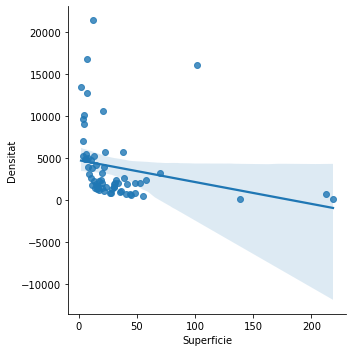

In [150]:
sns.lmplot(x='Superficie',y='Densitat',data=density,fit_reg=True)

In [151]:
# ALTAIR CODE ...
alt.Chart(density).mark_point().encode(
    x=alt.X('Densitat', title='Densitat'),
    y=alt.Y('Superficie', title='Superfície'),
    tooltip=['MUNICIPIDESCRIPCIO', 'Densitat', 'Superficie'],
    color=alt.Color('Densitat', scale=alt.Scale(scheme='blues'))
).properties(
    title='Correlation between Density and Size',
    width=700,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

From the Seaborn plot we can see that the larger cities are not necessarily the ones who have higher population! There's actually a very slight negative trend that indicated that in Catalonia, larger cities generally have lower population density.

From the Altair plot, the picture is not as clear since we don't have the trend line! So it was nice after all that I had some issues with Altair and resorted to Seaborn.

#### Do municipalities with a higher population density have a higher incidence of Covid-19?

Now we create another plot from a different dataframe to compare the population density with the number of cases of COVID-19 in each Municipality.

In [152]:
# changing the name from data so it's easier to retrieve the columns
data = data.rename(columns={'Densitat hab./km²': 'Densitat'})
data = data.rename(columns={'Superfície km²': 'Superficie'})

In [153]:
high_incidence = data.groupby(["MUNICIPIDESCRIPCIO","Densitat","Població"])["NUMCASOS"].agg("sum").reset_index()
high_incidence.head()

,MUNICIPIDESCRIPCIO,Densitat,Població,NUMCASOS
0,amposta,"157,7",21807,7188
1,badalona,"10552,7",223506,77848
2,banyoles,"1826,9",20187,7663
3,barberà del vallès,"3981,0",33082,11065
4,barcelona,"16144,0",1636193,580275


In [154]:
# Plotting
alt.Chart(high_incidence).mark_point().encode(
    x=alt.X('Densitat', title='Densitat'),
    y=alt.Y('NUMCASOS', title='NUMCASOS'),
    tooltip=['MUNICIPIDESCRIPCIO', 'Densitat', 'NUMCASOS'],
    color=alt.Color('Densitat', scale=alt.Scale(scheme='greens')),
).properties(
    title='Correlation between population density and incidence of COVID-19',
    width=700,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

From the Altair plot, we can say that there is no apparent correlation between population density and COVID-19 cases.

In [155]:
# using cases per capita
high_incidence['casos_per_capita'] = high_incidence['NUMCASOS'] / high_incidence['Població']

In [156]:
# Plotting
alt.Chart(high_incidence).mark_point().encode(
    x=alt.X('Densitat', title='Densitat'),
    y=alt.Y('casos_per_capita', title='casos_per_capita'),
    tooltip=['MUNICIPIDESCRIPCIO', 'Densitat', 'casos_per_capita'],
    color=alt.Color('Densitat', scale=alt.Scale(scheme='greens')),
).properties(
    title='Correlation between population density and incidence of COVID-19',
    width=700,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

After having plotted these two graphs we can safely say that there is no correlation between the density of a region and the COVID-19 incidence.

# Exercise 1.B. Relationship between catalan region economy and number of Covid-19 cases

## Data from COVID-19 and region (comarca)


For the second analysis, we can find data of the Territorial gross domestic product (GDP) (in catalan: Producte interior brut territorial (PIB)) (base 2017) for the anlaysis from [IDESCAT](https://www.idescat.cat/).

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of the Producte interior brut territorial (PIB) by region (in ctalan: comarca) (base 2017) (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=358)): "t15336.csv"
- Population data by municipalities and regions (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=925&t=2019)): "t15903.csv"


Answer the questions and write your conlcusions here:

In [187]:
# loading files
pib = pd.read_csv('./files/t15336.csv', sep=';')
pop_data = pd.read_csv('./files/t15903.csv', sep=';')

To load these files I also deleted the unnecessary lines at the top of the .csv file.

In [188]:
# visualizing the dataframes
pib.head()

,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100
Alt Camp,"1455,2","32,3","111,0"
Alt Empordà,"3162,1","22,6","77,6"
Alt Penedès,"3097,9","28,1","96,6"
Alt Urgell,"441,1","21,9","75,3"
Alta Ribagorça,"81,3","20,8","71,3"


In [189]:
pop_data.head()

,Municipi,Comarca,Codi,Altitud (m),Superfície (km²),Població
0,Abella de la Conca,Pallars Jussà,250019,956,"78,30",167
1,Abrera,Baix Llobregat,80018,105,"19,90",12697
2,Àger,Noguera,250024,642,"160,60",580
3,Agramunt,Urgell,250030,337,"79,70",5479
4,Aguilar de Segarra,Bages,80023,480,"43,30",287


In [190]:
# changing the format of some variables just in case
pop_data = pop_data.rename(columns={'Densitat hab./km²': 'Densitat'})
pop_data = pop_data.rename(columns={'Altitud (m)': 'Altitud'})

In [191]:
pib = pib.reset_index(drop=False)
pib = pib.rename(columns={'index': 'COMARCADESCRIPCIO'})
pib.head()

,COMARCADESCRIPCIO,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100
0,Alt Camp,"1455,2","32,3","111,0"
1,Alt Empordà,"3162,1","22,6","77,6"
2,Alt Penedès,"3097,9","28,1","96,6"
3,Alt Urgell,"441,1","21,9","75,3"
4,Alta Ribagorça,"81,3","20,8","71,3"


#### Q: Do richer regions have a lower incidence of Covid-19?

Now we compare the PIB per capita of the different regions with the number of COVID-19 cases of that region.

For this we need the "cases" dataframe and the "pib" dataframe.

In [192]:
casos_ = casos.copy()[["COMARCADESCRIPCIO","NUMCASOS"]]

In [193]:
casos["COMARCADESCRIPCIO"] = casos["COMARCADESCRIPCIO"].str.lower()

In [194]:
casos["COMARCADESCRIPCIO"].unique()

array(['baix llobregat', 'barcelones', 'valles occidental', 'bages',
       'osona', 'garrotxa', 'anoia', 'maresme', 'segria', 'garraf',
       'valles oriental', 'selva', 'alt urgell', 'tarragones', nan,
       'girones', 'baix camp', 'alt penedes', 'baix ebre', 'bergueda',
       'garrigues', 'moianès', 'alt emporda', "pla d'urgell", 'montsia',
       'solsones', 'urgell', 'segarra', 'baix penedes', 'baix emporda',
       "ribera d'ebre", "vall d'aran", 'conca de barbera',
       "pla de l'estany", 'alt camp', 'priorat', 'terra alta', 'ripolles',
       'pallars jussa', 'alta ribagorça', 'noguera', 'cerdanya',
       'pallars sobira'], dtype=object)

In [195]:
pib["COMARCADESCRIPCIO"].unique()

array(['Alt Camp', 'Alt Empordà', 'Alt Penedès', 'Alt Urgell',
       'Alta Ribagorça', 'Anoia', 'Aran', 'Bages', 'Baix Camp',
       'Baix Ebre', 'Baix Empordà', 'Baix Llobregat', 'Baix Penedès',
       'Barcelonès', 'Berguedà', 'Cerdanya', 'Conca de Barberà', 'Garraf',
       'Garrigues', 'Garrotxa', 'Gironès', 'Maresme', 'Moianès',
       'Montsià', 'Noguera', 'Osona', 'Pallars Jussà', 'Pallars Sobirà',
       "Pla d'Urgell", "Pla de l'Estany", 'Priorat', "Ribera d'Ebre",
       'Ripollès', 'Segarra', 'Segrià', 'Selva', 'Solsonès', 'Tarragonès',
       'Terra Alta', 'Urgell', 'Vallès Occidental', 'Vallès Oriental',
       'Catalunya'], dtype=object)

In [196]:
# we need to get rid of accents and put everything in lowercase for the merge
pib["COMARCADESCRIPCIO"] = pib["COMARCADESCRIPCIO"].str.lower()
pib['COMARCADESCRIPCIO'] = pib['COMARCADESCRIPCIO'].apply(lambda x: unidecode.unidecode(x))

In [197]:
pib["COMARCADESCRIPCIO"].unique()

array(['alt camp', 'alt emporda', 'alt penedes', 'alt urgell',
       'alta ribagorca', 'anoia', 'aran', 'bages', 'baix camp',
       'baix ebre', 'baix emporda', 'baix llobregat', 'baix penedes',
       'barcelones', 'bergueda', 'cerdanya', 'conca de barbera', 'garraf',
       'garrigues', 'garrotxa', 'girones', 'maresme', 'moianes',
       'montsia', 'noguera', 'osona', 'pallars jussa', 'pallars sobira',
       "pla d'urgell", "pla de l'estany", 'priorat', "ribera d'ebre",
       'ripolles', 'segarra', 'segria', 'selva', 'solsones', 'tarragones',
       'terra alta', 'urgell', 'valles occidental', 'valles oriental',
       'catalunya'], dtype=object)

In [198]:
data1 = pd.merge(pib,casos_,on="COMARCADESCRIPCIO",how="inner").drop_duplicates()
data1.head()

,COMARCADESCRIPCIO,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,NUMCASOS
0,alt camp,"1455,2","32,3","111,0",1
12,alt camp,"1455,2","32,3","111,0",55
14,alt camp,"1455,2","32,3","111,0",7
15,alt camp,"1455,2","32,3","111,0",37
17,alt camp,"1455,2","32,3","111,0",3


In [199]:
pib_analysis = data1.groupby(["COMARCADESCRIPCIO","PIB per habitant (milers d'euros)"])["NUMCASOS"].agg("sum").reset_index()
pib_analysis.head()

,COMARCADESCRIPCIO,PIB per habitant (milers d'euros),NUMCASOS
0,alt camp,"32,3",1926
1,alt emporda,"22,6",4022
2,alt penedes,"28,1",4147
3,alt urgell,"21,9",440
4,anoia,"20,6",4577


In [200]:
pib_analysis = pib_analysis.rename(columns={"PIB per habitant (milers d'euros)": 'Pib per capita'})

In [201]:
# Plotting
alt.Chart(pib_analysis).mark_point().encode(
    x=alt.X("Pib per capita", title="Pib per capita"),
    y=alt.Y('NUMCASOS', title='NUMCASOS'),
    tooltip=['COMARCADESCRIPCIO', "Pib per capita", 'NUMCASOS'],
    color=alt.Color("Pib per capita", scale=alt.Scale(scheme='purples')),
).properties(
    title='Correlation between population PIB per capita and incidence of COVID-19',
    width=700,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

There might be some outliers, so we'll get rid of them just in case.

In [202]:
# calculating the z-score 
pib_analysis['z_score'] = (pib_analysis['NUMCASOS'] - pib_analysis['NUMCASOS'].mean()) / pib_analysis['NUMCASOS'].std()

# getting the rows where Z-score>3 to get the names of the comarcas
outlier_rows = pib_analysis.loc[pib_analysis['z_score'].abs() > 3]

# removing outliers
pib_analysis = pib_analysis[pib_analysis['z_score'].abs() <= 3]
pib_analysis = pib_analysis.drop('z_score', axis=1)

# printing corresponding comarcas names
print("The following municipalities constitute outliers:")
print(outlier_rows['COMARCADESCRIPCIO'])

The following municipalities constitute outliers:
11    barcelones
Name: COMARCADESCRIPCIO, dtype: object


In [203]:
alt.Chart(pib_analysis).mark_point().encode(
    x=alt.X("Pib per capita", title="Pib per capita"),
    y=alt.Y('NUMCASOS', title='NUMCASOS'),
    tooltip=['COMARCADESCRIPCIO', "Pib per capita", 'NUMCASOS'],
    color=alt.Color("Pib per capita", scale=alt.Scale(scheme='purples')),
).properties(
    title='Correlation between population PIB per capita and incidence of COVID-19',
    width=700,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).interactive()

alt.Chart(...)

In [204]:
# calculating the z-score 
pib_analysis['z_score'] = (pib_analysis['NUMCASOS'] - pib_analysis['NUMCASOS'].mean()) / pib_analysis['NUMCASOS'].std()

# getting the rows where Z-score>3 to get the names of the comarcas
outlier_rows = pib_analysis.loc[pib_analysis['z_score'].abs() > 3]

# removing outliers
pib_analysis = pib_analysis[pib_analysis['z_score'].abs() <= 3]
pib_analysis = pib_analysis.drop('z_score', axis=1)

# printing corresponding comarcas names
print("The following municipalities constitute outliers:")
print(outlier_rows['COMARCADESCRIPCIO'])

The following municipalities constitute outliers:
37    valles occidental
Name: COMARCADESCRIPCIO, dtype: object


In [205]:
alt.Chart(pib_analysis).mark_point().encode(
    x=alt.X("Pib per capita", title="Pib per capita"),
    y=alt.Y('NUMCASOS', title='NUMCASOS'),
    tooltip=['COMARCADESCRIPCIO', "Pib per capita", 'NUMCASOS'],
    color=alt.Color("Pib per capita", scale=alt.Scale(scheme='purples')),
).properties(
    title='Correlation between population PIB per capita and incidence of COVID-19',
    width=700,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

alt.Chart(...)

After getting rid of some outliers, we can see that there is most likely a faint correlation between the PIB per capita and the incidence of COVID-19 in the Comarcas of Catalonia.

###### Note: 
If the three plots above titled "Correlation between population PIB per capita and incidence of COVID-19" don't show up when running all cells of the notebook, re-run all the cells from the beggining of Exercise 1B. This is a detail that appears only when we choose to run all the cells in the notebook.

# Exercise 1.C. Analyze the differences of Covid-19 affecting women and men in Catalonia

The last objective is to analyze the difference between the incidence of Covid-19 in women and men for all the municipalities in Catalonia. For that we just need access data of number of cases per sex and minicipality and build a population pyramid over ages, as the one presented here:
https://altair-viz.github.io/gallery/us_population_pyramid_over_time.html

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and age (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_edat.csv"


In [176]:
casos1 = pd.read_csv('./files/casos_sexe_edat.csv',sep=";", encoding='latin-1')
casos1 = casos1.reset_index(drop=True)

In [177]:
casos1.head()

,TIPUSCASDATA,REGIOSANITARIACODI,REGIOSANITARIADESCRIPCIO,EDATRANG,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,17/04/2020,7802,METROPOLITANA NORD,40-49,1.0,Dona,Positiu per ELISA,6
1,16/03/2021,7801,METROPOLITANA SUD,10-19,0.0,Home,Positiu per Test Ràpid,1
2,22/04/2020,7801,METROPOLITANA SUD,40-49,1.0,Dona,Positiu per ELISA,3
3,01/03/2021,7803,BARCELONA CIUTAT,70-79,0.0,Home,Positiu per ELISA,4
4,12/08/2020,7801,METROPOLITANA SUD,40-49,0.0,Home,Positiu per ELISA,2


In [178]:
plot_data = pd.pivot_table(casos1,values="NUMCASOS",columns=["SEXEDESCRIPCIO"],index=["EDATRANG"],aggfunc=["sum"])
plot_data.columns = plot_data.columns.droplevel()
plot_data = plot_data.rename_axis(None).reset_index().sort_values("index",ascending=False)

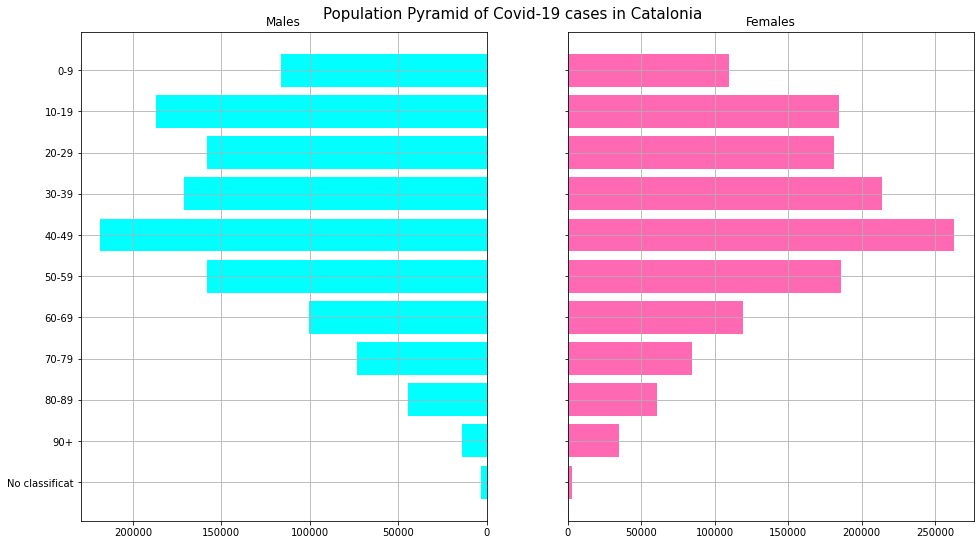

In [179]:
y = range(0, len(plot_data))
x_male = plot_data['Home']
x_female = plot_data['Dona']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16, 9))
fig.patch.set_facecolor('xkcd:white')
plt.figtext(.5,.9,"Population Pyramid of Covid-19 cases in Catalonia", fontsize=15, ha='center')
    
# define male and female bars
axes[0].barh(y, x_male, align='center', color='cyan')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='hotpink')
axes[1].set(title='Females')

axes[1].grid()
axes[0].set(yticks=y, yticklabels=plot_data['index'])
axes[0].invert_xaxis()
axes[0].grid()

plt.show()

In [180]:
# getting the exact number of COVID-19 cases for women and men.
casos1.groupby("SEXEDESCRIPCIO")["NUMCASOS"].sum()

SEXEDESCRIPCIO
Dona              1441670
Home              1244606
No classificat      70365
Name: NUMCASOS, dtype: int64

Answer the questions and write your conclusions here:

#### Does Covid-19 affect men more than women?

We can clearly see that COVID-19 affects more women than men in Catalonia. Generally speaking, in men we have around less 200K cases than in women!

#### What age groups does Covid-19 affect the most for men and women?

From the pyramid, we can see that the group that is most affected by COVID-19 is the 40-49 age range group, for both men and women.

We can also see that the pyramid is quite symmetric. The incidence of COVID-19 in all age groups seems to be replicated in both men and women. The only difference lies in the number of cases themselves. The behaviour of the incidence of COVID-19 is similar in men and in women.

However, as mentioned before, women do have more COVID-19 cases than men. Although we can also see from the pyramid that this doesn't mean that the COVID-19 incidence is higher for women in all age groups. For age groups 0-9 and 30-39, COVID-19 incidence is higher in men. In all other groups, the COVID-19 incidence is either similar in men and women, or is higher in women, with the age group 40-49 presenting the most disparity between the incidence of COVID-19 in men and in women. 

It would also be interesting to plot simultaneosly the population pyramid of Catalonia to more accurately see if the proportion of COVID-19 per age groups cases has some type of relationship with the total population age groups. That is, we can have a lot of COVID-19 cases for the 40-49 group but this group can be much bigger than for example, the 60-69 age group in such a way that in reality there's actually more people infected with COVID-19 in the 60-69 age group but we can't obtain that information from here, since visually we can't detect it.

### Exercise 2:

One thing to be done could eventually be to redo all the exercises, but conditioning them to the sex of the population. For example, following the past exercise where we see that COVID-19 incidence is higher in women, we might be interested in seeing if this tendency is still present for men and women across different Municipalities. 

In [181]:
# function to plot the number of cases both in men and women in a given Municipality
def plot_hist(municipi):
    df_municipi = casos_sex[casos_sex['MUNICIPIDESCRIPCIO'] == municipi]
    # Create chart
    chart = alt.Chart(df_municipi).mark_bar().encode(
        x=alt.X('SEXEDESCRIPCIO:N', title='Sex'),
        y=alt.Y('NUMCASOS:Q', title='NumCasos'),
        color=alt.Color('SEXEDESCRIPCIO:N', legend=alt.Legend(title='Sex'),
                        scale=alt.Scale(domain=['Dona', 'Home'],
                                        range=['#E2B0ED', '#AEEAE8']))
    ).properties(
        title=f'NUMCASOS per SEXEDESCRIPCIO a {municipi}',
        width=700,
        height=400
    )
    return chart

In [211]:
# retrieving some variables from the 'data' dataframe
casos_sex = data.groupby(["MUNICIPIDESCRIPCIO","Població",'SEXEDESCRIPCIO'])["NUMCASOS"].agg("sum").reset_index()

In [212]:
# ELIMINATING OUTLIERS JUST IN CASE 
casos_sex['z_score'] = (casos_sex['NUMCASOS'] - casos_sex['NUMCASOS'].mean()) / casos_sex['NUMCASOS'].std()

# getting the rows where Z-score>3 to get the names of the municipalities
outlier_rows = casos_sex.loc[casos_sex['z_score'].abs() > 3]

# removing outliers
casos_sex = casos_sex[casos_sex['z_score'].abs() <= 3]
casos_sex = casos_sex.drop('z_score', axis=1)

Now from all the Municipalities we can choose one and see the difference between the COVID-19 incidence in men and women.

In [213]:
# list of possible Municipalities to investigate
casos_sex['MUNICIPIDESCRIPCIO'].unique()

array(['amposta', 'badalona', 'banyoles', 'barberà del vallès', 'blanes',
       'calafell', 'cambrils', 'castellar del vallès', 'castelldefels',
       'cerdanyola del vallès', 'cornellà de llobregat', 'el masnou',
       'el prat de llobregat', 'el vendrell', 'esparreguera',
       'esplugues de llobregat', 'figueres', 'gavà', 'girona',
       'granollers', 'igualada', "l'hospitalet de llobregat", 'lleida',
       'lloret de mar', 'manlleu', 'manresa', 'martorell', 'mataró',
       'molins de rei', 'mollet del vallès', 'montcada i reixac',
       'olesa de montserrat', 'olot', 'palafrugell', 'pineda de mar',
       'premià de mar', 'reus', 'ripollet', 'rubí', 'sabadell', 'salou',
       'salt', 'sant adrià de besòs', 'sant andreu de la barca',
       'sant boi de llobregat', 'sant cugat del vallès',
       'sant feliu de guíxols', 'sant feliu de llobregat',
       'sant joan despí', 'sant pere de ribes', 'sant quirze del vallès',
       'sant vicenç dels horts', 'santa coloma de gram

In [184]:
# Selecting a Municipi will show the number of cases divided by sex
plot_hist('sitges')

alt.Chart(...)

In [185]:
plot_hist('tarragona')

alt.Chart(...)

In [214]:
plot_hist('girona')

alt.Chart(...)

In [215]:
plot_hist('sant cugat del vallès')

alt.Chart(...)

I picked random Municipalities and, interestingly, in all of them the incidence was higher in women than in men.

Now, we will see how women and men separate in the tendency "higher population implies higher incidence of COVID-19" we have seen above.

In [239]:
# clicking on a bar will filter the scatter plot
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(casos_sex).mark_point().encode(
    x='NUMCASOS:Q',
    y='Població:Q',
    color=alt.Color('SEXEDESCRIPCIO:N', legend=None,
                scale=alt.Scale(domain=['Dona', 'Home'],
                                range=['#E2B0ED', '#AEEAE8'])),
    tooltip=['NUMCASOS', 'MUNICIPIDESCRIPCIO']
).properties(
    width=700,
    height=400
).transform_filter(
    click
).interactive()

# plot squares to choose the sex
hist = alt.Chart(casos_sex).mark_bar().encode(
    #x='count()',
    y='SEXEDESCRIPCIO',
    color=alt.condition(click, 'SEXEDESCRIPCIO', alt.value('lightgray'))
).properties(
    width=35,
    height=70
).add_selection(
    click
)
# adding the plots
hist & scatter

alt.VConcatChart(...)

In the plot above, we can both zoom in, see to what Municipalities each data point corresponds, and we can also filter the plot by clicking the squares (and eliminating the filters by clicking twice in either square).

Now we can see that both women and men follow the same tendency - higher population, higher COVID-19 cases - as expected. However, we have seen that the incidence in women is higher than in men. Maybe this could be because there is more women in Catalonia? This scatter plot shows clearly that most of the Municipalities have higher numbers of male population than female population. However, in females, COVID-19 incidence is higher!

In this plot, not only can we see the difference between the COVID-19 cases in men and women for each Municipality, but we can also see the total population for each Municipality, making it possible to conduct a more just comparison between COVID-19 incidence between women and men in Catalonia.

#### Other ideas

These databases would be very interesting to work with in Tableau and to create a dashboard with. Especially if we were given the latitude and longitude of each Municipality. This way we could create an interactive map and see more clearly the incidence of COVID-19.